In [1]:
import pickle
import scanpy as sc
import squidpy as sq
from util import *
from Algorithm.graph import *
from Algorithm.distribution import *

In [ ]:
ctrl_A = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_A_data.h5ad')
adata_A = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_A_data.h5ad')
adata_B = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_B_data.h5ad')
adata_C = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_C_data.h5ad')

F:\conda\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


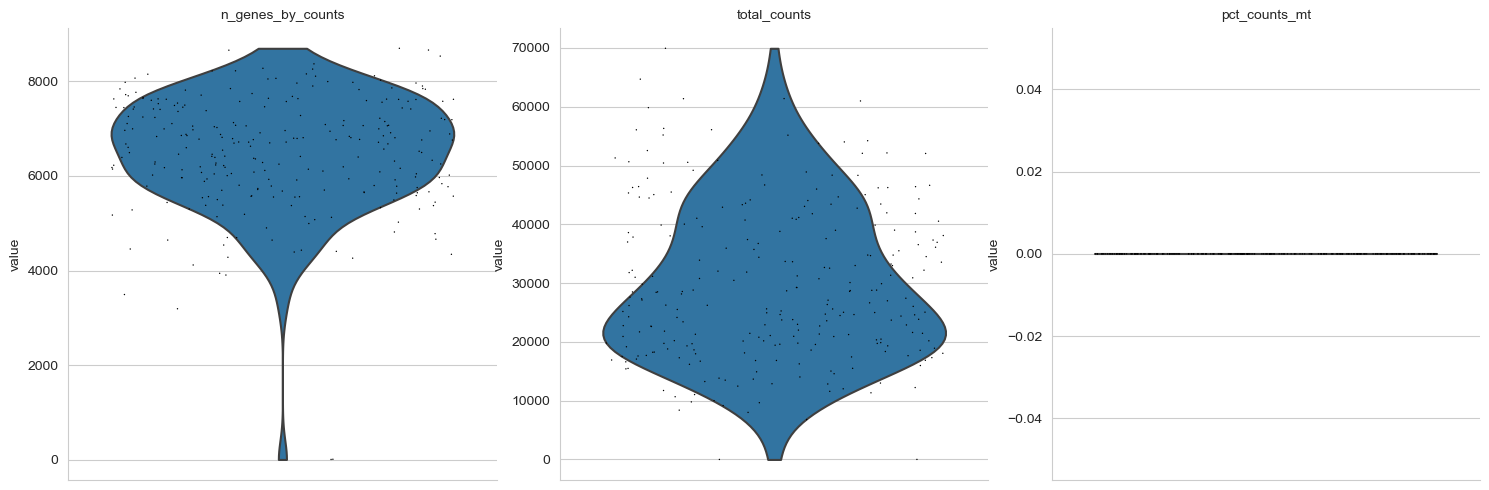

In [2]:
test = sc.read_h5ad('F://Rep11_MOB_ST.h5ad')
position_list = list(test.obs.index.str.split('x'))
arr = np.array(position_list, dtype=np.float32).reshape(len(position_list), 2)
test.obs['fig_x'] = arr[:,0] * 1000
test.obs['fig_y'] = arr[:,1] * 1000

h5_path = 'E://human/GSM4838131_Visium_Sample_A_filtered_feature_bc_matrix.h5'
csv_path = 'E://human/GSM4838131_Visium_Sample_A_tissue_positions_list.csv'

h5_path = 'E://human/GSM4838133_Visium_Sample_C_filtered_feature_bc_matrix.h5'
csv_path = 'E://human/GSM4838133_Visium_Sample_C_tissue_positions_list.csv'

h5_path = '/Users/sunpeisen/Downloads/data/GSM4838132_Visium_Sample_B_filtered_feature_bc_matrix.h5'
csv_path = '/Users/sunpeisen/Downloads/data/GSM4838132_Visium_Sample_B_tissue_positions_list.csv'

h5_path = 'E://human/GSM4838132_Visium_Sample_B_filtered_feature_bc_matrix.h5'
csv_path = 'E://human/GSM4838132_Visium_Sample_B_tissue_positions_list.csv'

adata = sc.read_10x_h5(h5_path)
add_spatial_position(adata, csv_path)
adata = test
adata.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata, inplace=True)

#sc.pp.filter_genes(adata, min_cells=2)
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var_names_make_unique()

#adata = adata[adata.obs["pct_counts_mt"] < 8]
sc.pl.violin(adata,
             ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pp.filter_genes(adata, min_cells=50)

In [ ]:
result = convolve(get_3d_matrix(adata), kernel=get_gaussian_kernel(size=5))
update_anndata(result, adata)

In [6]:
adata.var

,gene_ids,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mt,n_cells
Nrf1,Nrf1,105,0.580153,0.457521,59.923664,152.0,5.030438,False,105
Zbtb5,Zbtb5,112,0.591603,0.464742,57.251908,155.0,5.049856,False,112
Ccnl1,Ccnl1,204,2.137405,1.143396,22.137405,560.0,6.329721,False,204
Lrrfip1,Lrrfip1,160,1.557252,0.938933,38.931298,408.0,6.013715,False,160
Bbs1,Bbs1,173,1.358779,0.858144,33.969466,356.0,5.877736,False,173
...,...,...,...,...,...,...,...,...,...
Clip1,Clip1,69,0.419847,0.350549,73.664122,110.0,4.709530,False,69
Hcfc2,Hcfc2,54,0.278626,0.245786,79.389313,73.0,4.304065,False,54
Sergef,Sergef,56,0.316794,0.275200,78.625954,83.0,4.430817,False,56
Cacng2,Cacng2,53,0.324427,0.280980,79.770992,85.0,4.454347,False,53


In [7]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [9]:
gene_list = adata.var[adata.var['highly_variable']==True].index
len(gene_list)

2206

In [45]:
adata

AnnData object with n_obs × n_vars = 262 × 9868
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'fig_x', 'fig_y', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'spatial'

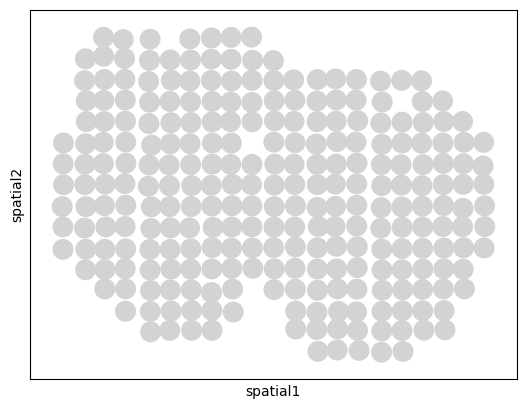

In [44]:
sc.pl.spatial(adata, spot_size=1)

In [313]:
paper = ['Rab3b','Necab2','Tspan7','Cdr1','Slc17a7','4933405L10Rik','Taf7l','Gna14','Olfr635','Pmepa1','Pcp4','Apc','Rbfox3','Penk','Frzb','Fabp7','Slc6a11','Apod','S100a5','Arhgap33','Cplx1','Trnp1','Marcks','Atp1b1','Vtn','Trak2','Igf1','Gabra1','Igfbp2','Lpar1','Omp','Kif5b','Sorbs1','Cck','Nr2f2','Scd1','Cpe','Aqp4','Doc2g','Slc1a2','Nrgn','Cdhr1','Mcf2l','Kctd12','Unc13c','Foxd3','Prokr2','Gng13','Kcnh3','Camk2b','Baiap2','Ccnd1','Gpsm1','Pbx1','Sepp1','Apoe','Tubb2b','Ncdn','Glul','Sash1','Ptgds','Sparcl1','Mbp','Nrsn1','Igfbp5','Ptn','Sfrp5']
gene_list = adata.var[adata.var['gene_ids'].isin(paper)].index
len(gene_list)

In [36]:
gmm_dict = fit_gmms(adata, gene_list[:16], n_comp=10, thread=4)

In [37]:
with open('gmm_dict1.pickle', 'wb') as file:
    pickle.dump(gmm_dict, file)

In [2]:
with open('gmm_dict.pickle', 'rb') as file:
    loaded_dict = pickle.load(file)

In [3]:
arr = build_distance_array(loaded_dict)

Processing...: 100%|██████████| 9868/9868 [18:45:11<00:00,  6.84s/it]   


In [4]:
with open('arr.pickle', 'wb') as file:
    pickle.dump(arr, file)

In [25]:
loaded_dict.keys()

dict_keys(['Whrn', 'Lrrfip1', 'Sox2', 'X2010300C02Rik', 'Cldn5', 'Map3k11', 'Fam213a', 'Sh3gl2', 'Sh3bgrl', 'Ptbp3', 'Zmynd11', 'Secisbp2l'])

In [2]:
with open('arr.pickle', 'rb') as file:
    loaded_arr = pickle.load(file)

In [3]:
with open('gmm_dict.pickle', 'rb') as file:
    loaded_dict = pickle.load(file)

In [25]:
result = cluster(loaded_arr, n_clusters=30, mds_components=50)

In [26]:
result

,gene_id,labels
0,Nrf1,8
1,Zbtb5,8
2,Lrrfip1,0
3,Ccnl1,2
4,Whrn,6
...,...,...
9863,Hcfc2,6
9864,Clip1,9
9865,Sergef,9
9866,Cacng2,9


C:\Users\pssun\AppData\Local\Temp\ipykernel_6436\3277627410.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  color=list(result[result['labels']==0]['gene_id'][:25]))


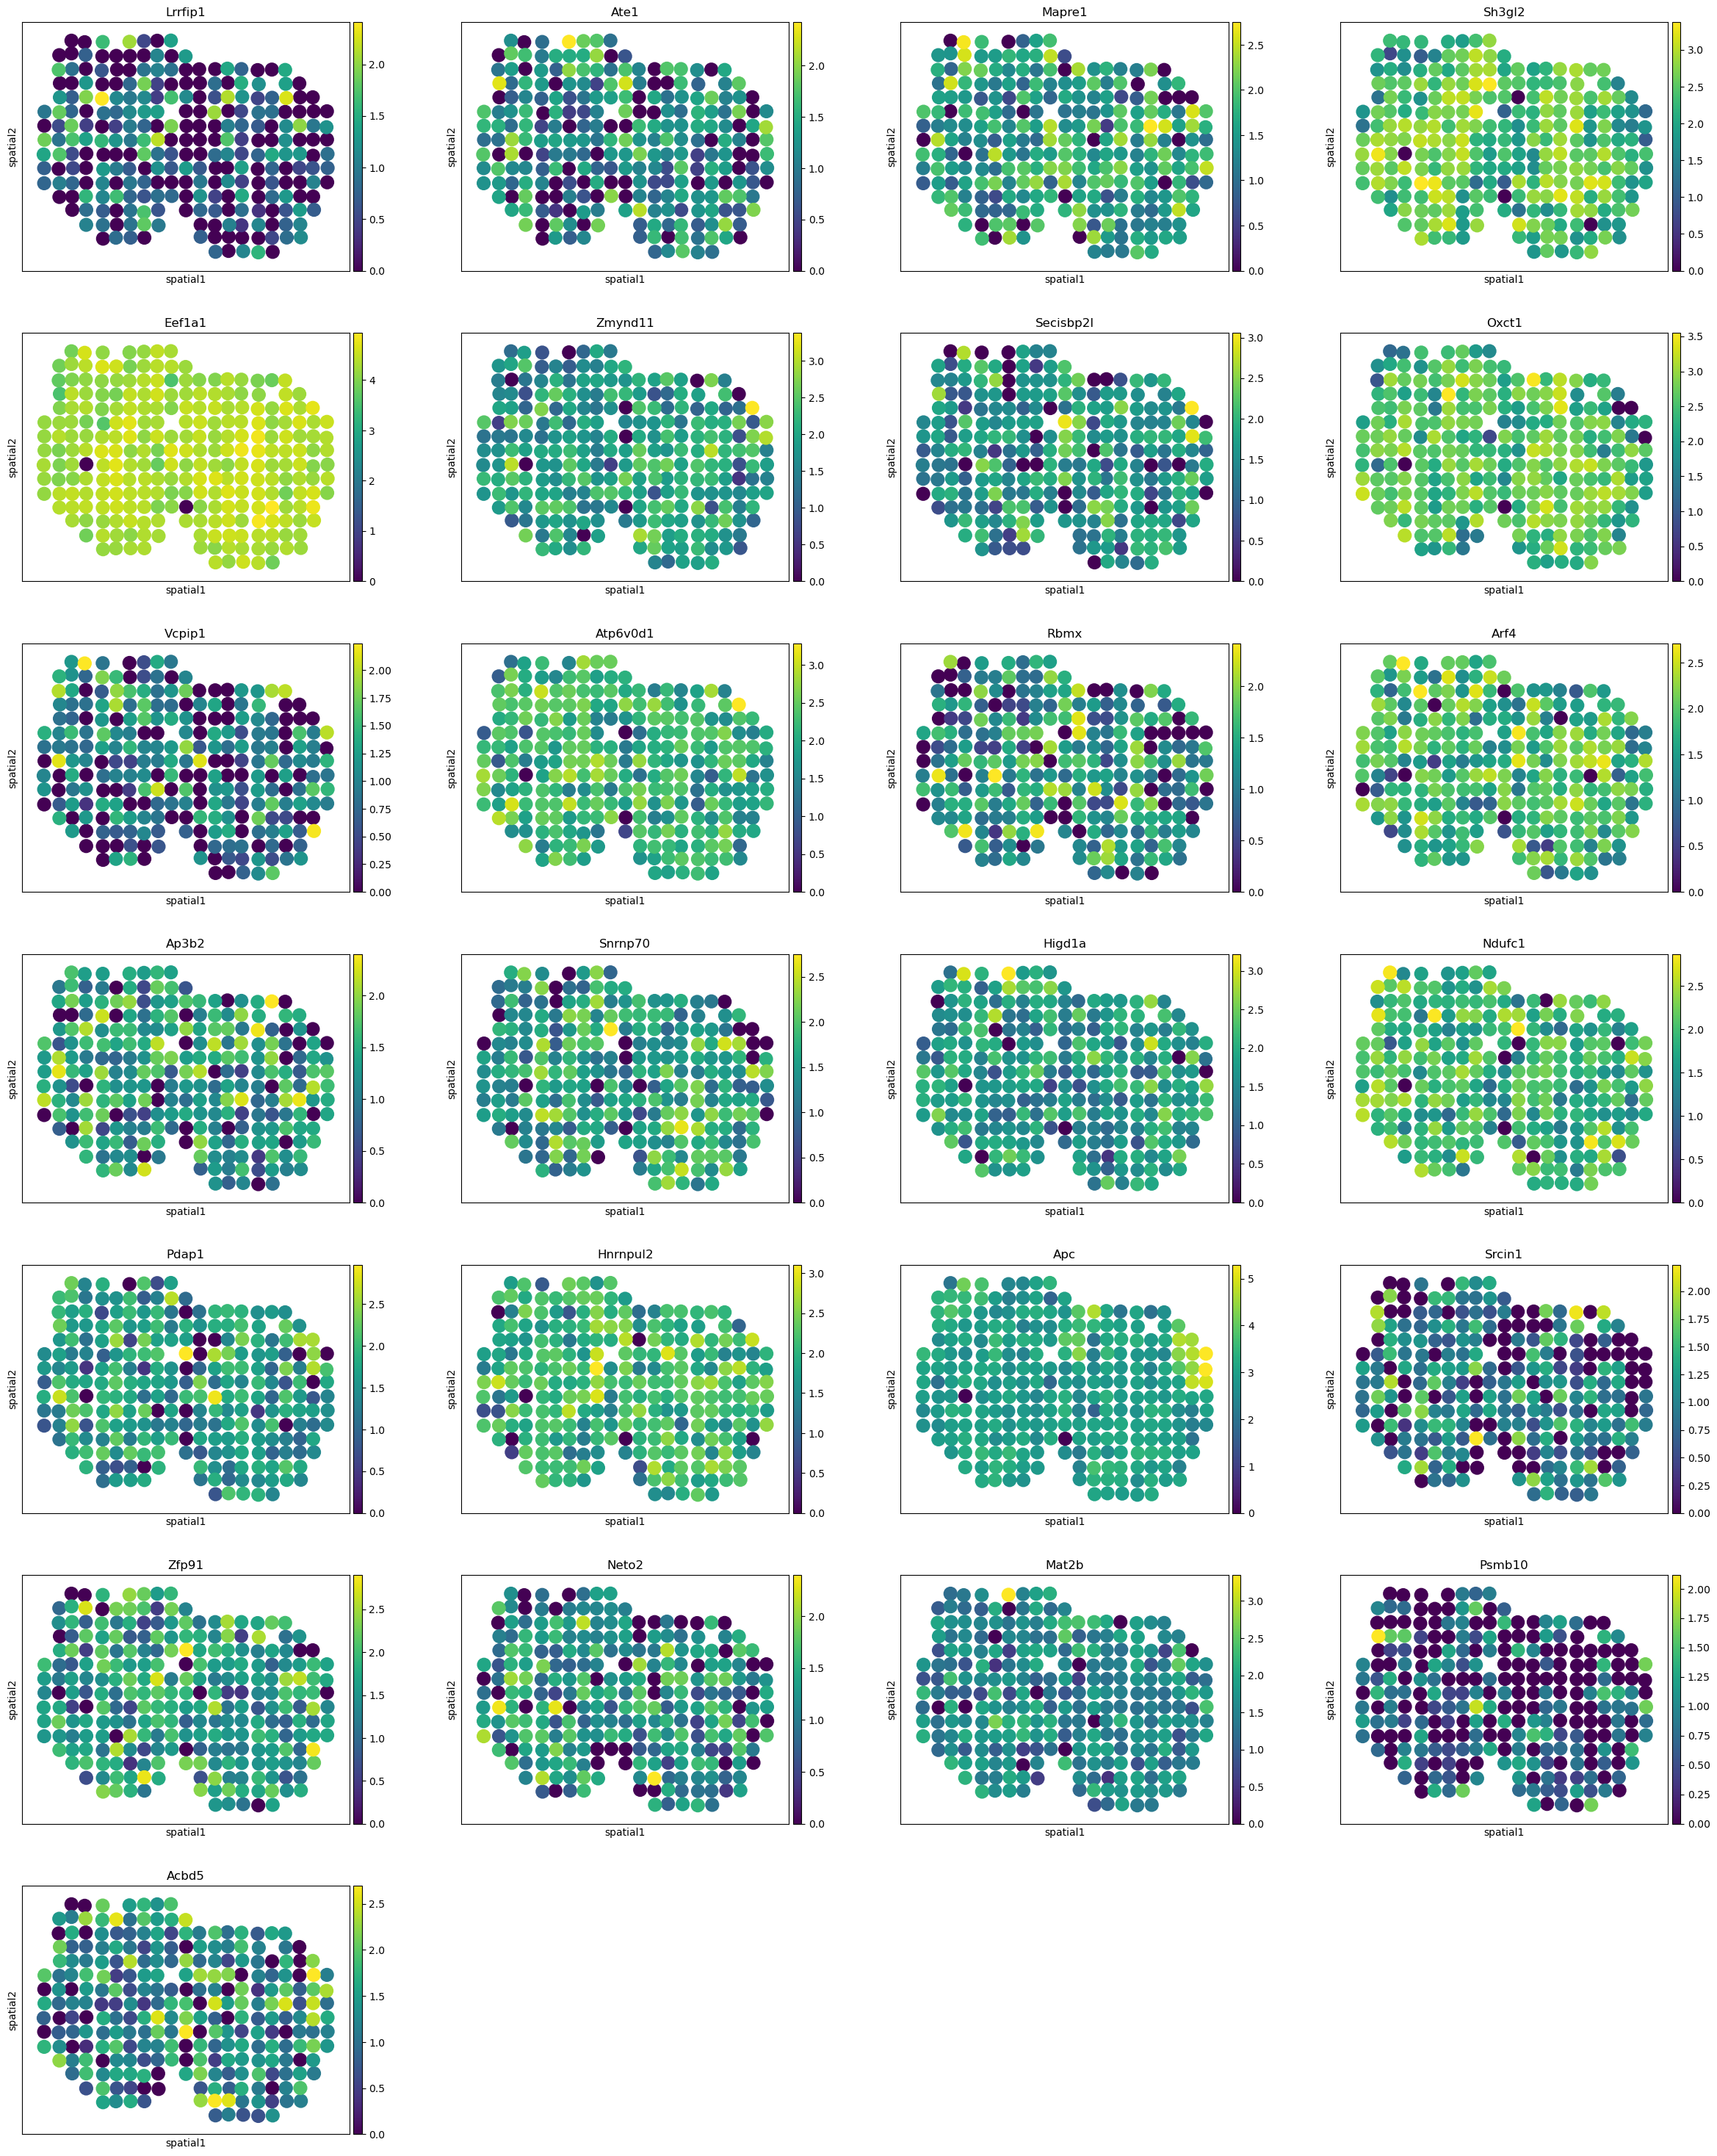

In [38]:
sc.pl.spatial(adata,
              size=2,
              spot_size=.5,
              color=list(result[result['labels']==0]['gene_id'][:25]))

([<matplotlib.axis.XTick at 0x15c606b5160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

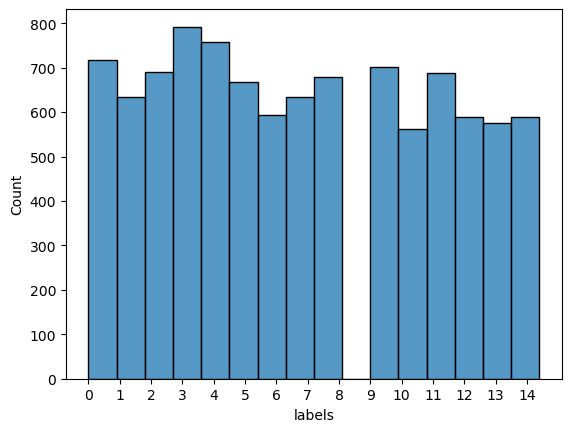

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(result['labels'],binwidth=.9)
plt.xticks([i, for i in range(15)])